# IME672A GROUP-5 <br> Medical Insurance Cost Prediction
## Part 2 - Predicting data

### Installing extra libraries 

In [1]:
!pip install xgboost

### Importing the required libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
import math
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import xgboost as xg
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [3]:
df=pd.read_csv(r"C:\Users\Aditya\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Find the datatype and count of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df["smoker"] = df["smoker"].astype("category")
df = pd.get_dummies(df, columns= ["smoker"])

In [7]:
df["sex"] = df["sex"].astype("category")
df = pd.get_dummies(df, columns= ["sex"])

In [8]:
df["region"] = df["region"].astype("category")
df = pd.get_dummies(df, columns= ["region"])

In [9]:
df.head()

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,1,0,0


In [10]:
data1=df

In [11]:
mx=list(df.columns)

In [12]:
data1.columns=mx

In [13]:
data1

,age,bmi,children,charges,smoker_no,smoker_yes,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,1,0,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [14]:
accu={}

### Preparing the training and testing dataset 

In [15]:
x=data1.drop('charges',axis=1)
y=data1['charges']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.2,random_state=20)

#reproducibility of results

### Normalizing the data using StandardScaler 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test) 

### Using Linear Regression

In [18]:
model1=LinearRegression()
model1.fit(x_train,y_train)
a1=model1.score(x_test,y_test)
accu['Linear_Regression']=a1*100
a1*100

79.59688488543414

In [19]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
y_1=model1.predict(x_test)
print(mae(y_1,y_test))
print(mse(y_1,y_test))

4042.20017353082
30680789.79429359


### Using RandomForest Regression

In [20]:
model2=RandomForestRegressor(random_state=0)
model2.fit(x_train,y_train)
a2=model2.score(x_test,y_test)
accu['RandomForest Regression']=a2*100
a2*100

89.2015053546142

In [21]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
y_2=model2.predict(x_test)
print(mae(y_2,y_test))
print(mse(y_2,y_test))

2234.264386331343
16238027.499701058


### Using XGBoost Regression

In [22]:
model3 = xg.XGBRegressor(random_state=0)
model3.fit(x_train,y_train)
a3=model3.score(x_test,y_test)
accu['XGBoost Regression']=a3*100
a3*100

87.15504743612988

In [23]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
y_3=model3.predict(x_test)
print(mae(y_3,y_test))
print(mse(y_3,y_test))

2527.6579855285677
19315349.01983801


### Using KNeighborsRegressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor
model4=KNeighborsRegressor(n_neighbors=5)
model4.fit(x_train,y_train)
a4=model4.score(x_test,y_test)
accu['KNeighborsRegressor']=a4*100
a4*100

85.62638231115822

In [25]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
y_4=model4.predict(x_test)
print(mae(y_4,y_test))
print(mse(y_4,y_test))

2952.6680425261193
21614049.639903642


### Using GradientBoostingRegression

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
model5=GradientBoostingRegressor(random_state=0)
model5.fit(x_train, y_train)
a5=model5.score(x_test,y_test)
accu['GBRegression']=a5*100
a5*100

90.42927364082448

In [27]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
y_5=model5.predict(x_test)
print(mae(y_5,y_test))
print(mse(y_5,y_test))

2204.7861135798394
14391794.682123814


### Using AdaBoost Regression

In [28]:
from sklearn.ensemble import AdaBoostRegressor
model6=AdaBoostRegressor(random_state=0, n_estimators=100)
model6.fit(x_train, y_train)
a6=model6.score(x_test,y_test)
accu['AdaBoost Regression']=a6*100
a6*100

85.51133252486561

In [29]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
y_6=model6.predict(x_test)
print(mae(y_6,y_test))
print(mse(y_6,y_test))

3679.7393101909825
21787053.531186994


In [30]:
model= list(accu.keys())
val= list(accu.values())

In [31]:
accu

{'Linear_Regression': 79.59688488543414,
 'RandomForest Regression': 89.2015053546142,
 'XGBoost Regression': 87.15504743612988,
 'KNeighborsRegressor': 85.62638231115822,
 'GBRegression': 90.42927364082448,
 'AdaBoost Regression': 85.51133252486561}

Text(0.5, 1.0, 'Accuracies of different models')

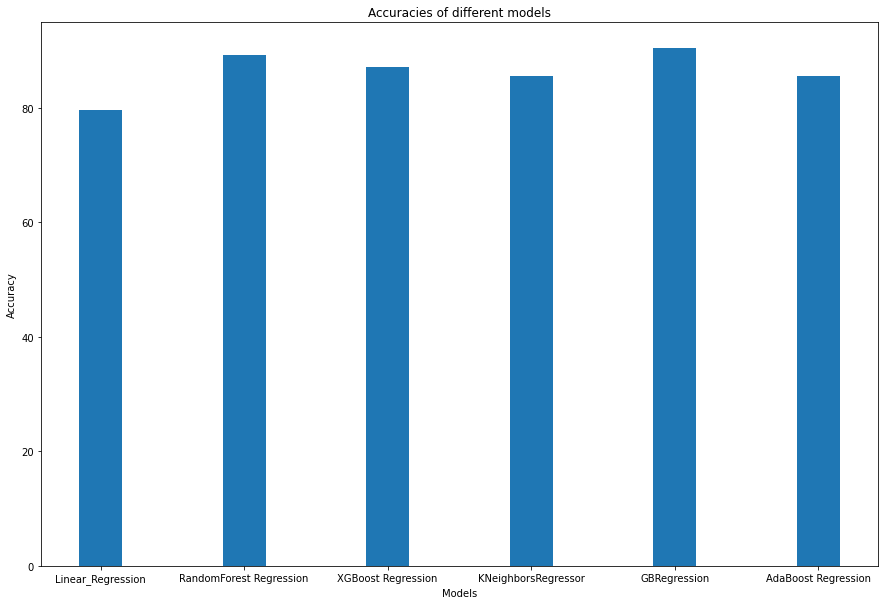

In [32]:
plt.figure(figsize=(15,10))
 
# creating the bar plot
plt.bar(model, val,width = 0.3)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracies of different models")

### Best regressor is gradient boosting regressor

In [33]:
n_estimators = [100, 200]
learning_rate=[0.01,0.1]
min_samples_split = [1,5]
min_samples_leaf = [1,2]

In [34]:
random_grid={'n_estimators': n_estimators,'learning_rate': learning_rate,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

In [35]:
gb_grid=RandomizedSearchCV(estimator=GradientBoostingRegressor(),param_distributions=random_grid,cv=3,verbose=2,n_jobs= 4)

#total of 16 combinations possible
#by default 10 combinations are taken randomly among 16. This is stored in the n_iter variable

In [36]:
gb_grid.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\Aditya\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.83712075 0.82420467 0.82908623 0.83755092        nan 0.72727531
 0.72729077        nan 0.82089756        nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [1, 5],
                                        'n_estimators': [100, 200]},
                   verbose=2)

In [37]:
print(gb_grid.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'learning_rate': 0.1}


In [38]:
final=GradientBoostingRegressor(n_estimators=100,min_samples_split=5,min_samples_leaf=2,learning_rate=0.1,random_state=2)

In [39]:
final.fit(x_train, y_train)
acc=final.score(x_test,y_test)

### Accuracy of the Model

In [40]:
print("Accuracy of the model is : ",acc*100,"%")

Accuracy of the model is :  90.71388613394112 %


In [41]:
ypred=final.predict(x_test)

In [42]:
ypred

array([12103.13633909, 10016.41933224, 10332.87062685, 16828.70154713,
        4390.22750207,  4256.20107406,  5252.46068055,  9933.00229911,
       28224.68189678, 10216.96427207, 17499.62634396, 38226.24401886,
        6434.08140799, 12833.47943493, 16898.07437005, 10226.76451562,
       21758.49876449,  9908.60877595,  4147.542104  , 12140.12128259,
       47466.08575312,  9769.1173811 , 12128.96119796,  3934.66814206,
        6746.79819957,  7852.14898944, 24922.53145864, 14579.28930448,
       36280.15901153,  9616.295489  ,  9290.35578436,  5446.25937296,
       30190.3028197 , 45917.44429489, 15023.28034556,  3999.78679942,
        8216.23949185,  4640.97915074, 22985.30761854, 15512.57762804,
       13778.86325836, 13493.46707296,  2766.04846491,  3929.34129284,
       17457.19430969,  8954.73280095,  5091.78538666,  7796.03511432,
       44794.15192925,  5016.02484679,  8789.16668416, 27873.11795357,
       10313.5675576 , 12103.13633909,  6482.05260298, 34703.25352957,
      

In [43]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [44]:
abs_error = mae(ypred,y_test)
mse_error=mse(ypred,y_test)

In [45]:
print("Mean absolute error : ",abs_error)
print("Root mean squared error : ",math.sqrt(mse_error))

Mean absolute error :  2169.1952303442417
Root mean squared error :  3736.818720447782


In [46]:
res={'Actual':y_test,'Predicted':ypred}
result=pd.DataFrame(res)

In [47]:
result

,Actual,Predicted
698,10976.24575,12103.136339
520,25656.57526,10016.419332
1144,9630.39700,10332.870627
908,15170.06900,16828.701547
559,1646.42970,4390.227502
...,...,...
851,14119.62000,17212.252401
109,47055.53210,45558.673035
941,9549.56510,9532.326163
600,1633.04440,3422.016669


In [48]:
abc=[]
for i in range(result.shape[0]):
    abc.append(i)

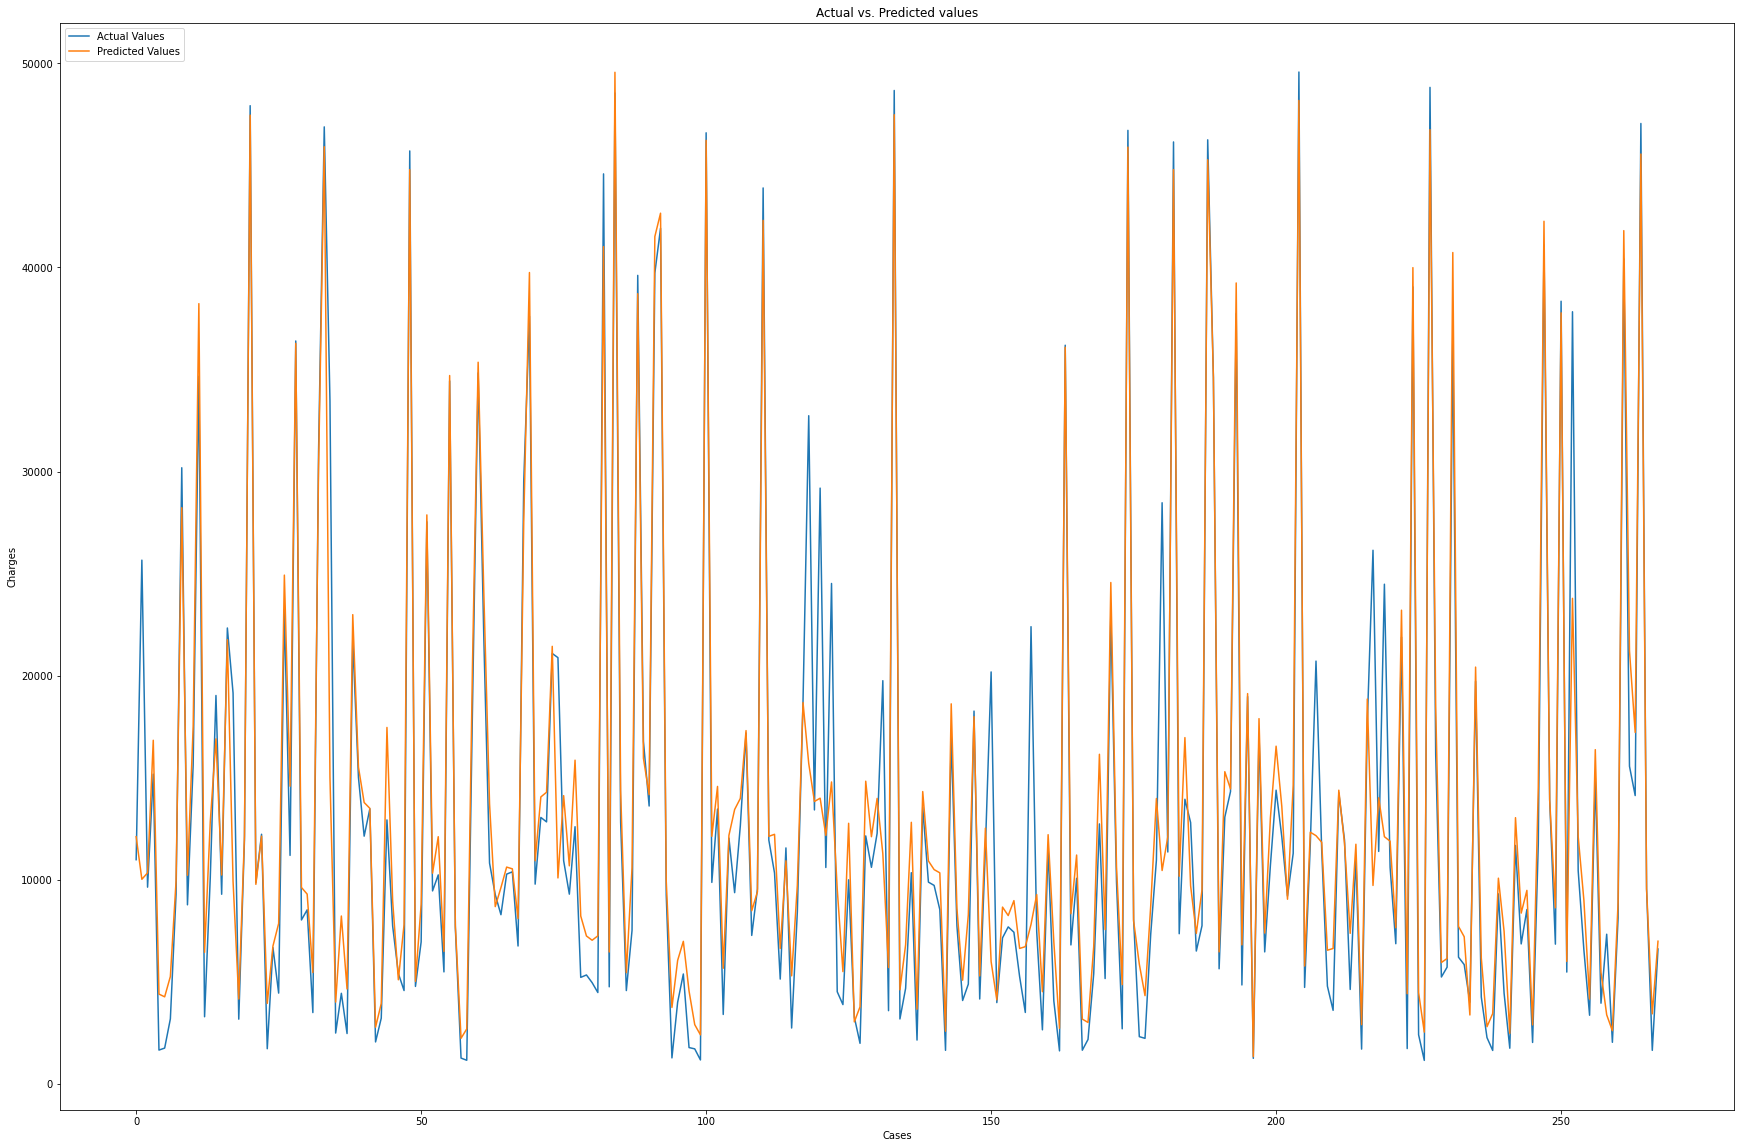

In [49]:
fig=plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(111)
ax1.plot(abc,result['Actual'],label='Actual Values')
ax1.plot(abc,result['Predicted'],label='Predicted Values')
plt.xlabel("Cases")
plt.ylabel("Charges")
plt.title("Actual vs. Predicted values")
plt.legend(loc='upper left');